# **Import Dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve





df = pd.read_csv('Data/Class-smell.csv')
print("Shape of original DataFrame: ", df.shape)
df



Shape of original DataFrame:  (91790, 49)


,Unnamed: 0,Address,Brain Class,Data Class,Futile Abstract Pipeline,Futile Hierarchy,God Class,Schizofrenic Class,ABUSEINH,AMW,...,NrBM,NrEC,NrFE,NrIC,NrSS,PNAS,SCHIZO,TCC,WMC,WOC
0,4,org.apache.ambari.log4j.hadoop.mapreduce.jobhi...,0,0,0,0,0,1,0,1.0,...,0,0,0,0,0,0.00,2,0.00,3,1.0
1,46,org.apache.ambari.msi.StateProvider,0,0,0,0,0,1,0,0.0,...,0,0,0,0,0,-1.00,3,0.00,0,1.0
2,73,org.apache.ambari.server.controller.AbstractRo...,0,0,0,1,0,0,0,0.0,...,0,0,0,0,0,-1.00,0,0.00,0,1.0
3,87,org.apache.ambari.server.controller.internal.A...,0,0,0,0,0,1,0,1.0,...,0,0,0,0,0,-1.00,4,0.14,9,1.0
4,89,org.apache.ambari.server.controller.internal.H...,0,0,0,0,0,1,0,1.0,...,0,0,0,0,0,-1.00,2,0.71,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91785,303145,org.apache.bookkeeper.common.testing.annotatio...,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,-1.00,0,0.00,0,0.0
91786,302625,com.scurrilous.circe.params.SipHash24Parameters,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,0.67,0,0.00,5,1.0
91787,63756,org.springframework.security.oauth.provider.to...,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,0.00,0,0.00,1,0.0
91788,25671,org.eclipse.mylyn.internal.github.ui.gist.Crea...,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,-1.00,0,1.00,2,0.0


# **Create new label 'IsCodeSmell'**

In [68]:
smell_columns = [
    'Brain Class', 'Data Class', 'Futile Abstract Pipeline', 'Futile Hierarchy',
    'God Class', 'Schizofrenic Class'
]

df['IsCodeSmell'] = df[smell_columns].max(axis=1)

df = df.drop(columns=['Unnamed: 0', 'Address','SCHIZO'] + smell_columns)

print("Shape of the data frame: ",df.shape)
print("Total null values: ",df.isna().sum())
print("Duplicate values: ",df.duplicated().sum())
print("Shape of original DataFrame: ", df.shape)
df = df.drop_duplicates()
print("Duplicate values: ",df.duplicated().sum())
print("Shape of the data frame: ",df.shape)

Shape of the data frame:  (91790, 41)
Total null values:  ABUSEINH       0
AMW            0
ATFD           0
BOvM           0
BUR            0
CBO            0
CC             0
CM             0
CRIX           0
DAC            0
DIT            0
EDUPCLS        0
FANOUT         0
FDP            0
GREEDY         0
HDUPCLS        0
HIT            0
IDUPLINES      0
LOCC           0
NAS            0
NAbsM          0
NDU            0
NOA            0
NOAM           0
NOD            0
NODD           0
NOM            0
NOPA           0
NProtM         0
NSPECM         0
NTempF         0
NrBM           0
NrEC           0
NrFE           0
NrIC           0
NrSS           0
PNAS           0
TCC            0
WMC            0
WOC            0
IsCodeSmell    0
dtype: int64
Duplicate values:  18699
Shape of original DataFrame:  (91790, 41)
Duplicate values:  0
Shape of the data frame:  (73091, 41)


# **Label Distribution**

C:\Users\PC\AppData\Local\Temp\ipykernel_8748\2604912178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='IsCodeSmell', palette='Set2')


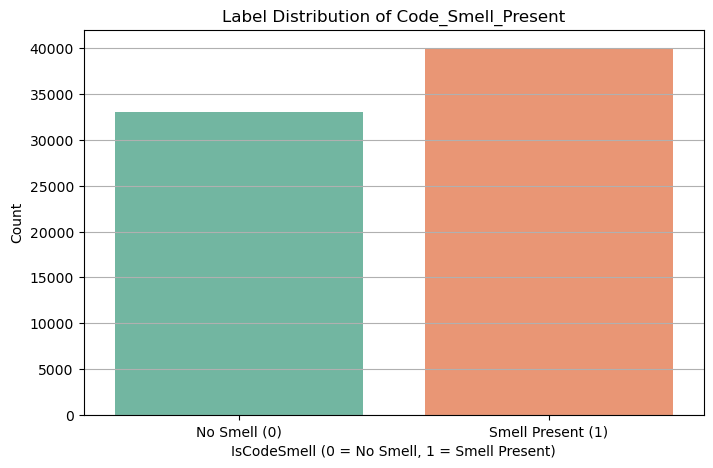

Shape of the data frame:  (73091, 41)


In [69]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='IsCodeSmell', palette='Set2')
plt.title('Label Distribution of Code_Smell_Present')
plt.xlabel('IsCodeSmell (0 = No Smell, 1 = Smell Present)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Smell (0)', 'Smell Present (1)'])
plt.grid(axis='y')
plt.show()
df['IsCodeSmell'].value_counts()
print("Shape of the data frame: ",df.shape)

# **Split features and target**

In [70]:
X = df.drop(columns=['IsCodeSmell'])
y = df['IsCodeSmell']

## **Split into Train and Test**

Explained Variance Ratio: [0.18062557 0.07371948 0.06223841 0.05487166 0.04865091 0.04411774
 0.04079851 0.03520434 0.03318105 0.03106786 0.02763961 0.02646051
 0.02509757 0.0240838  0.02341824 0.02316006 0.02177502 0.01932214
 0.01908111 0.01879031 0.0179307  0.0174827  0.01675912 0.01577753
 0.01412317 0.01285315 0.01192595 0.00968577 0.0090074 ]
Total Explained Variance: 0.9588494004688725


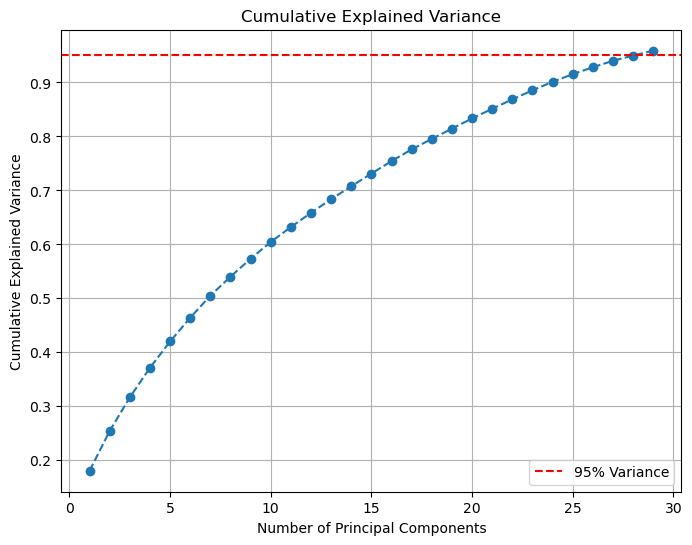

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio=pca.explained_variance_ratio_
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance:", np.sum(pca.explained_variance_ratio_))
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# **Evaluate Function**

In [72]:
def evaluate_model(model, X_test, y_test, model_name='Model'):
    """
    Trains and evaluates the given model, and displays performance metrics, including CCR.
    """
    # Make predictions on training data
    y_train_pred = model.predict(X_train)

    # Make predictions on test data
    y_test_pred = model.predict(X_test)

    # CCR for training data
    train_ccr = accuracy_score(y_train, y_train_pred) * 100  
    
    # CCR for test data
    test_ccr = accuracy_score(y_test, y_test_pred) * 100  

    # Calculate and display metrics for training data
    print(f"--- Performance of {model_name} on Training Data ---")
    print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))
    print(f"Training CCR: {train_ccr:.2f}%")  
    print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

    # Calculate and display metrics for test data
    print(f"\n--- Performance of {model_name} on Test Data ---")
    print("Testing Accuracy Score:", accuracy_score(y_test, y_test_pred))
    print(f"Testing CCR: {test_ccr:.2f}%")  
    print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))

    # Confusion Matrix for Training Data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Training Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Confusion Matrix for Test Data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Testing Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve and AUC Score for Test Data
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'{model_name} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()


# **Random Forest**

Cross-Validation Scores: [0.82590851 0.81282599 0.81785531 0.82059176 0.82341372]
Mean Cross-Validation Score: 0.8201190570463156
--- Performance of Random Forest Classifier on Training Data ---
Training Accuracy Score: 0.996083595567109
Training CCR: 99.61%
Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     26511
           1       1.00      1.00      1.00     31961

    accuracy                           1.00     58472
   macro avg       1.00      1.00      1.00     58472
weighted avg       1.00      1.00      1.00     58472


--- Performance of Random Forest Classifier on Test Data ---
Testing Accuracy Score: 0.8202339421301047
Testing CCR: 82.02%
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      6552
           1       0.86      0.81      0.83      8067

    accuracy                           0.82     14619
   mac

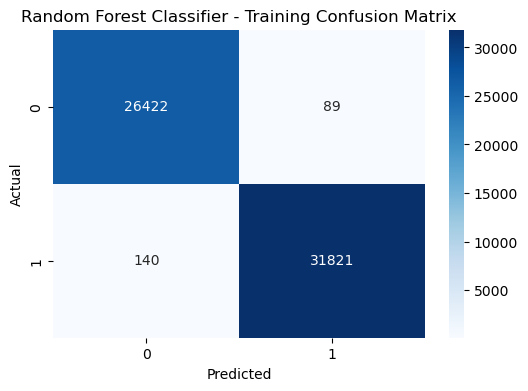

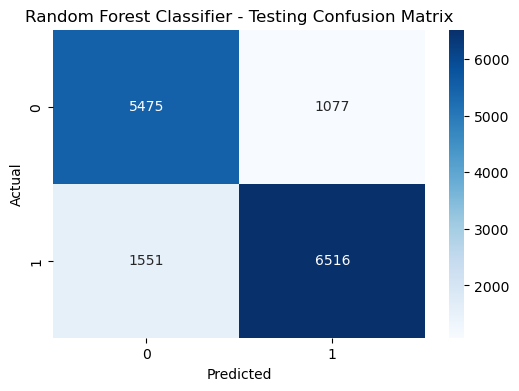

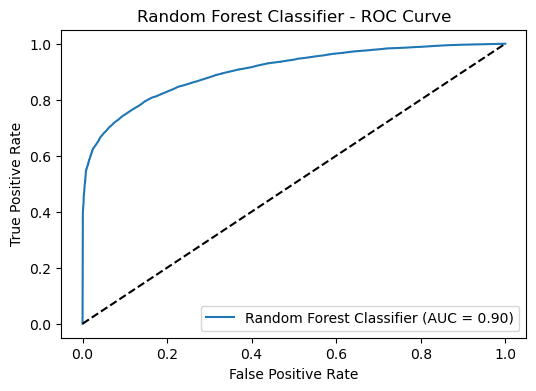

In [73]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)




# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


evaluate_model(rf_model, X_test, y_test, model_name='Random Forest Classifier')

# **Gradient Boosting**

Cross-Validation Scores (Gradient Boosting): [0.78982471 0.78589141 0.78792543 0.79168805 0.79220113]
Mean Cross-Validation Score (Gradient Boosting): 0.7895061447559775
--- Performance of Gradient Boosting Classifier on Training Data ---
Training Accuracy Score: 0.7959878232316322
Training CCR: 79.60%
Training Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79     26511
           1       0.87      0.74      0.80     31961

    accuracy                           0.80     58472
   macro avg       0.80      0.80      0.80     58472
weighted avg       0.81      0.80      0.80     58472


--- Performance of Gradient Boosting Classifier on Test Data ---
Testing Accuracy Score: 0.7863738969833778
Testing CCR: 78.64%
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.86      0.78      6552
           1       0.86      0.73      0.79      8067

    accurac

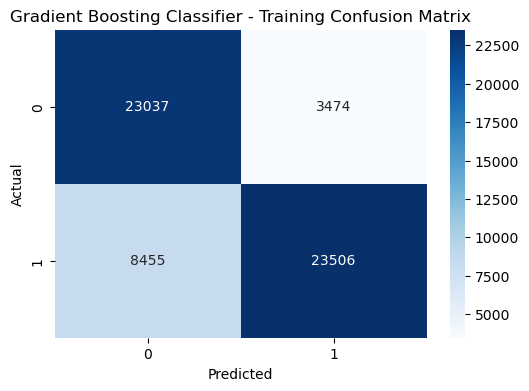

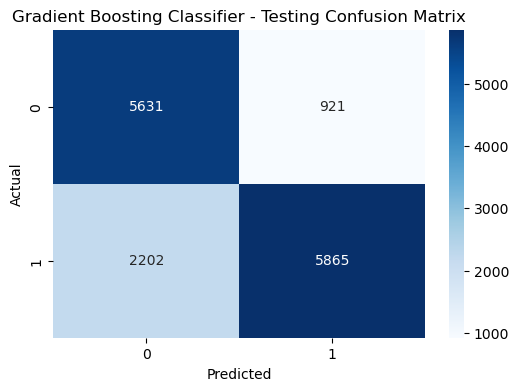

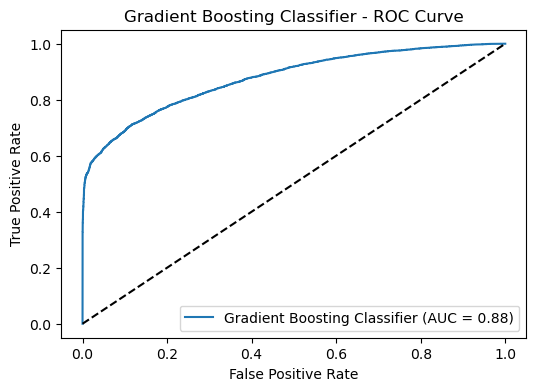

In [74]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)


# Perform cross-validation for Gradient Boosting
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores (Gradient Boosting):", cv_scores_gb)
print("Mean Cross-Validation Score (Gradient Boosting):", np.mean(cv_scores_gb))


evaluate_model(gb_model, X_test, y_test, model_name='Gradient Boosting Classifier')


# **Logistic Regression**

Cross-Validation Scores (Logistic Regression): [0.77845233 0.77366396 0.77680862 0.77304601 0.78065675]
Mean Cross-Validation Score (Logistic Regression): 0.7765255324732511
--- Performance of Logistic Regression on Training Data ---
Training Accuracy Score: 0.776918867150089
Training CCR: 77.69%
Training Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.87      0.78     26511
           1       0.86      0.70      0.78     31961

    accuracy                           0.78     58472
   macro avg       0.79      0.78      0.78     58472
weighted avg       0.79      0.78      0.78     58472


--- Performance of Logistic Regression on Test Data ---
Testing Accuracy Score: 0.7704357343183529
Testing CCR: 77.04%
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.86      0.77      6552
           1       0.86      0.69      0.77      8067

    accuracy              

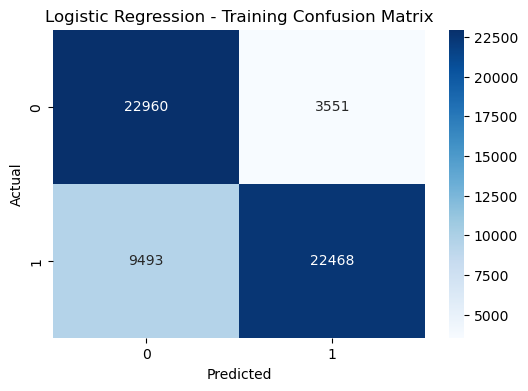

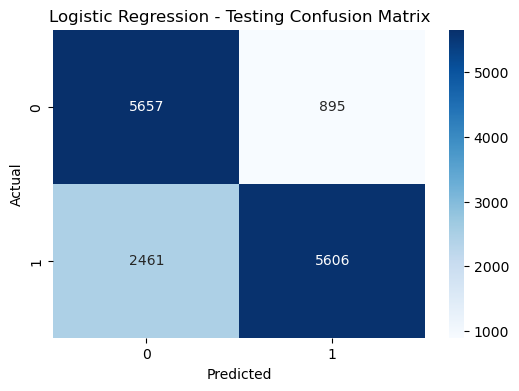

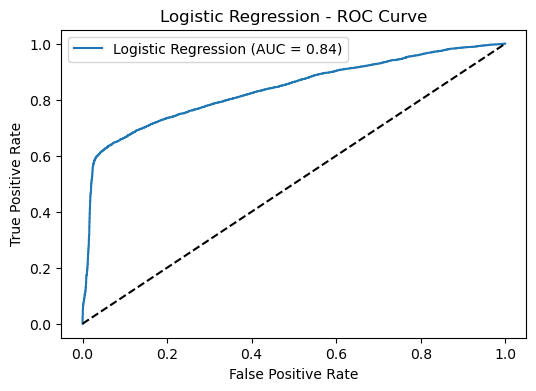

In [75]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores (Logistic Regression):", cv_scores_lr)
print("Mean Cross-Validation Score (Logistic Regression):", np.mean(cv_scores_lr))

evaluate_model(lr_model, X_test, y_test, model_name='Logistic Regression')

# **Multi-Layer Perceptron (MLP)**

d:\Apps\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Apps\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores (MLP): [0.8465156  0.84266781 0.84658799 0.84915341 0.8515478 ]
Mean Cross-Validation Score (MLP): 0.8472945239710669
--- Performance of Multi-Layer Perceptron (MLP) Classifier on Training Data ---
Training Accuracy Score: 0.914198248734437
Training CCR: 91.42%
Training Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     26511
           1       0.93      0.91      0.92     31961

    accuracy                           0.91     58472
   macro avg       0.91      0.91      0.91     58472
weighted avg       0.91      0.91      0.91     58472


--- Performance of Multi-Layer Perceptron (MLP) Classifier on Test Data ---
Testing Accuracy Score: 0.8524522881182024
Testing CCR: 85.25%
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      6552
           1       0.87      0.86      0.86      8067

    accuracy      

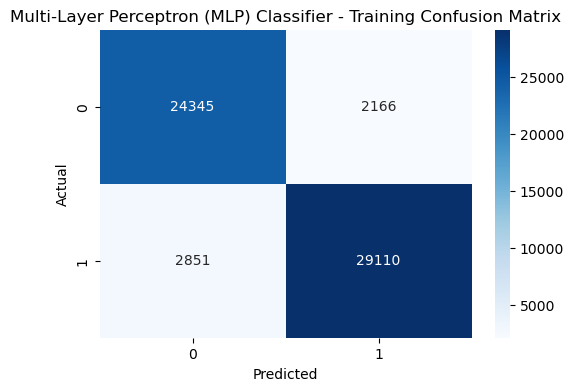

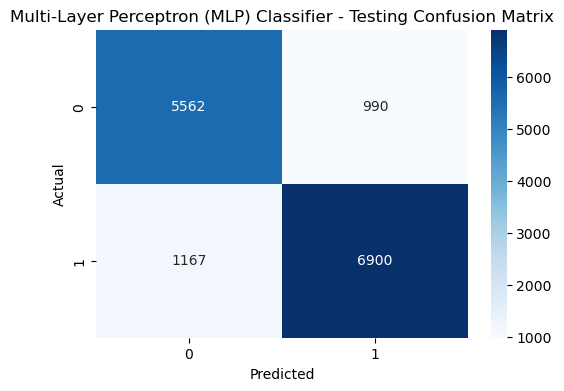

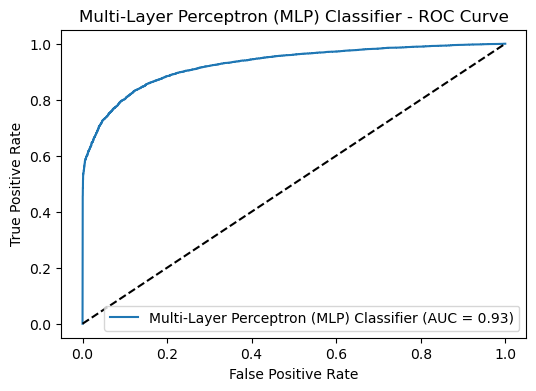

In [76]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)
cv_scores_mlp = cross_val_score(mlp_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores (MLP):", cv_scores_mlp)
print("Mean Cross-Validation Score (MLP):", np.mean(cv_scores_mlp))

evaluate_model(mlp_model, X_test, y_test, model_name='Multi-Layer Perceptron (MLP) Classifier')


# **AdaBoost Classifier**

d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\anaconda3\Lib\site-packages\skle

Cross-Validation Scores (AdaBoost): [0.77776828 0.76810603 0.76945442 0.77048059 0.77535488]
Mean Cross-Validation Score (AdaBoost): 0.7722328395022189
--- Performance of AdaBoost Classifier on Training Data ---
Training Accuracy Score: 0.7765084142837597
Training CCR: 77.65%
Training Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77     26511
           1       0.83      0.74      0.78     31961

    accuracy                           0.78     58472
   macro avg       0.78      0.78      0.78     58472
weighted avg       0.78      0.78      0.78     58472


--- Performance of AdaBoost Classifier on Test Data ---
Testing Accuracy Score: 0.7655790409740748
Testing CCR: 76.56%
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.76      6552
           1       0.83      0.73      0.77      8067

    accuracy                           0.77    

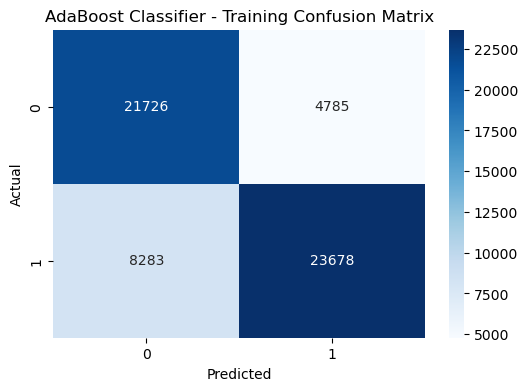

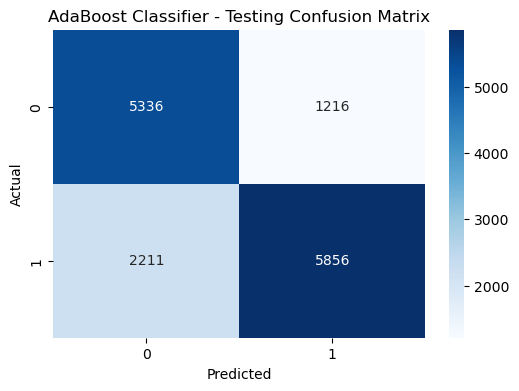

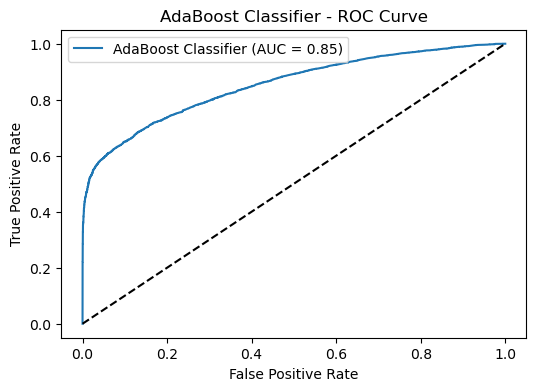

In [77]:
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# Perform cross-validation for AdaBoost
cv_scores_ada = cross_val_score(ada_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores (AdaBoost):", cv_scores_ada)
print("Mean Cross-Validation Score (AdaBoost):", np.mean(cv_scores_ada))


evaluate_model(ada_model, X_test, y_test, model_name='AdaBoost Classifier')
